In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
img = cv2.imread("/content/drive/MyDrive/Dataset/NORMAL/IM-0115-0001.jpeg")
img.shape

(1858, 2090, 3)

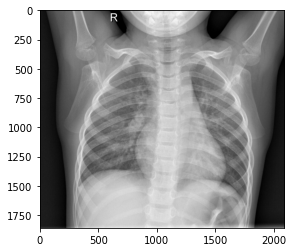

In [3]:
plt.imshow(img)

In [4]:
import os
data_path = "/content/drive/MyDrive/Dataset"

categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories, labels)) #empty dictionary

print(label_dict)
print(labels)
print(categories)

{'NORMAL': 0, 'PNEUMONIA': 1}
[0, 1]
['NORMAL', 'PNEUMONIA']


In [5]:
img_size = 100
data = []
target = []

for category in categories:
  folder_path = os.path.join(data_path, category)
  img_names = os.listdir(folder_path)


  for img_name in img_names:
    img_path = os.path.join(folder_path,img_name)
    img = cv2.imread(img_path)

    try:
      resized = cv2.resize(img,(img_size, img_size))
      #resize the image into 100 X 100, since we need a fixed common size for all the data
      data.append(resized)
      target.append(label_dict[category])
      #appending the image and the label(categorized) into list (dataset)

    except Exception as e:
      print("Exception: ", e)
      #if any exception raised, the exception will printed here. and pass to the next image

#Rescale  and assign categorical feature

In [6]:
import numpy as np
data = np.array(data)/255.0
data=np.reshape(data,(data.shape[0], img_size, img_size, 3))
target = np.array(target)
from keras.utils import np_utils
new_target = np_utils.to_categorical(target)

In [7]:
new_target.shape

(4522, 2)

In [8]:
new_target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [9]:
data.shape

(4522, 100, 100, 3)

In [10]:
data.shape[1:]

(100, 100, 3)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(200, (3,3), input_shape = data.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by MaxPooling layers

model.add(Conv2D(200,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layers followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50, activation="relu"))
#Dense layer of 64 neurons
model.add(Dense(2, activation="softmax"))
#The Final layer with two outputs for two categories

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 200)       360200    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 200)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 200)      0         
 2D)                                                    

# Splitting data into training and testing 

In [13]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data, new_target, test_size=0.1)

In [14]:
train_data.shape

(4069, 100, 100, 3)

In [15]:
train_target.shape

(4069, 2)

In [22]:
#checkpoint = model.checkpoint("model-{epoch:03d}".model, monitor=val_loss", verbose=0, save_best_only=True, model)
history = model.fit(train_data, train_target, epochs=10, validation_split=0.2)

Epoch 1/10
102/102 [==============================] - 384s 4s/step - loss: 0.0681 - accuracy: 0.9727 - val_loss: 0.0762 - val_accuracy: 0.9693
Epoch 2/10
102/102 [==============================] - 385s 4s/step - loss: 0.0625 - accuracy: 0.9782 - val_loss: 0.1076 - val_accuracy: 0.9570
Epoch 3/10
102/102 [==============================] - 385s 4s/step - loss: 0.0621 - accuracy: 0.9751 - val_loss: 0.0712 - val_accuracy: 0.9767
Epoch 4/10
102/102 [==============================] - 383s 4s/step - loss: 0.0493 - accuracy: 0.9803 - val_loss: 0.0693 - val_accuracy: 0.9742
Epoch 5/10
102/102 [==============================] - 383s 4s/step - loss: 0.0410 - accuracy: 0.9828 - val_loss: 0.0832 - val_accuracy: 0.9705
Epoch 6/10
102/102 [==============================] - 383s 4s/step - loss: 0.0365 - accuracy: 0.9849 - val_loss: 0.0802 - val_accuracy: 0.9742
Epoch 7/10
102/102 [==============================] - 384s 4s/step - loss: 0.0277 - accuracy: 0.9896 - val_loss: 0.0806 - val_accuracy: 0.9717

In [23]:
model.save("/content/drive/MyDrive/Dataset/model.h5")

In [24]:
from matplotlib import pyplot as plt

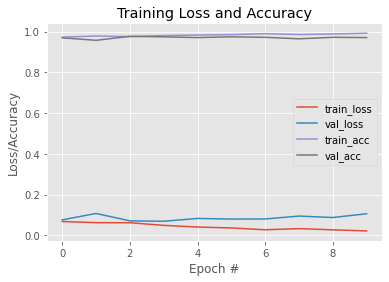

In [25]:
#plot the training loss and accuracy
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")
